In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.2 MB/s 


# Data Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import shap

In [ ]:
life=pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Preprocessing

In [ ]:
life.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
life["Life expectancy "].fillna(
    value = life["Life expectancy "].mean(),
    inplace = True
)

In [ ]:
life["Adult Mortality"].fillna(
    value = life["Adult Mortality"].mean(),
    inplace = True
)

In [ ]:
life["Alcohol"].fillna(
    value = life["Alcohol"].mean(),
    inplace = True
)

In [ ]:
life["Hepatitis B"].fillna(
    value = life["Alcohol"].mean(),
    inplace = True
)

In [ ]:
life[" BMI "].fillna(
    value = life[" BMI "].mean(),
    inplace = True
)

In [ ]:
life["Polio"].fillna(
    value = life["Polio"].mean(),
    inplace = True
)

In [ ]:
life["Total expenditure"].fillna(
    value = life["Total expenditure"].mean(),
    inplace = True
)

In [ ]:
life["Diphtheria "].fillna(
    value = life["Diphtheria "].mean(),
    inplace = True
)

In [ ]:
life["GDP"].fillna(
    value = life["GDP"].mean(),
    inplace = True
)

In [ ]:
life["Population"].fillna(
    value = life["Population"].mean(),
    inplace = True
)

In [ ]:
life[" thinness  1-19 years"].fillna(
    value = life[" thinness  1-19 years"].mean(),
    inplace = True
)

In [ ]:
life[" thinness 5-9 years"].fillna(
    value = life[" thinness 5-9 years"].mean(),
    inplace = True
)

In [ ]:
life["Income composition of resources"].fillna(
    value = life["Income composition of resources"].mean(),
    inplace = True
)

In [ ]:
life["Schooling"].fillna(
    value = life["Schooling"].mean(),
    inplace = True
)

In [ ]:
life.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
#mengubah tipe data Year menjadi object
life['Year']=[str(i) for i in life['Year']]

In [ ]:
life.dtypes

Country                             object
Year                                object
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
life['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [ ]:
life['Year'].value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

In [ ]:
life['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [ ]:
life_dmy=pd.get_dummies(life)
life_dmy.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,1,0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,1,0,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,1,0,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
life_dmy=life_dmy.drop(['Country_Afghanistan','Status_Developing','Year_2000'],axis=1)
life_dmy

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,1,0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,1,0,0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,1,0,0,0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,1,0,0,0,0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0,0,0,0,0,0,0,0,0,0
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0,0,0,0,0,0,0,0,0,0
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0,0,0,0,0,0,0,0,0,0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
life_dmy.to_csv('life Preprocessed.csv',index=False)

In [ ]:
life_dmy=pd.read_csv('/content/life Preprocessed.csv')

In [ ]:
X_life=life_dmy.drop(['Life expectancy '],axis=1)
Y_life=life_dmy['Life expectancy ']

In [ ]:
#Untuk Data Regresi (life)
X_trainr,X_testr,Y_trainr,Y_testr=train_test_split(X_life,Y_life,test_size=0.3)

In [ ]:
print(X_trainr.shape)
print(X_testr.shape)
print(Y_trainr.shape)
print(Y_testr.shape)

(2056, 226)
(882, 226)
(2056,)
(882,)


In [ ]:
np.random.seed(123)

# Modelling

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
clf1=DecisionTreeRegressor(criterion='squared_error') #MSE
clf1.fit(X_trainr,Y_trainr)

NameError: ignored

[Text(0.6834813450714775, 0.9857142857142858, 'X[11] <= 0.75\nsquared_error = 90.842\nsamples = 2056\nvalue = 69.174'),
 Text(0.4702967857248812, 0.9571428571428572, 'X[0] <= 163.5\nsquared_error = 35.17\nsamples = 1536\nvalue = 73.394'),
 Text(0.26947807965776316, 0.9285714285714286, 'X[16] <= 0.817\nsquared_error = 20.806\nsamples = 1079\nvalue = 75.858'),
 Text(0.09343761662775003, 0.9, 'X[16] <= 0.609\nsquared_error = 12.401\nsamples = 754\nvalue = 73.882'),
 Text(0.0328168255921255, 0.8714285714285714, 'X[0] <= 70.5\nsquared_error = 19.543\nsamples = 103\nvalue = 69.346'),
 Text(0.012401042594181547, 0.8428571428571429, 'X[14] <= 6.9\nsquared_error = 16.702\nsamples = 48\nvalue = 66.271'),
 Text(0.005925302336123298, 0.8142857142857143, 'X[0] <= 19.0\nsquared_error = 12.785\nsamples = 27\nvalue = 68.467'),
 Text(0.00207223688257864, 0.7857142857142857, 'X[15] <= 1.35\nsquared_error = 7.098\nsamples = 11\nvalue = 71.618'),
 Text(0.00103611844128932, 0.7571428571428571, 'X[9] <= 3.9

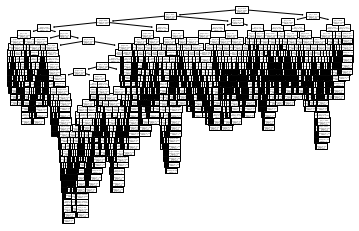

In [ ]:
plot_tree(clf1)

In [ ]:
Y_pred=clf1.predict(X_testr)
print("MSE:",mean_squared_error(Y_testr,Y_pred))
print("MAE:",mean_absolute_error(Y_testr,Y_pred))

MSE: 7.128548752834468
MAE: 1.6319727891156464


Feature: 0, Score: 0.21188
Feature: 1, Score: 0.00145
Feature: 2, Score: 0.00363
Feature: 3, Score: 0.00135
Feature: 4, Score: 0.00705
Feature: 5, Score: 0.00283
Feature: 6, Score: 0.00564
Feature: 7, Score: 0.02403
Feature: 8, Score: 0.00223
Feature: 9, Score: 0.00359
Feature: 10, Score: 0.00044
Feature: 11, Score: 0.59424
Feature: 12, Score: 0.00203
Feature: 13, Score: 0.00234
Feature: 14, Score: 0.00726
Feature: 15, Score: 0.01103
Feature: 16, Score: 0.08980
Feature: 17, Score: 0.01354
Feature: 18, Score: 0.00012
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00074
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00020
Feature: 26, Score: 0.00008
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00011
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

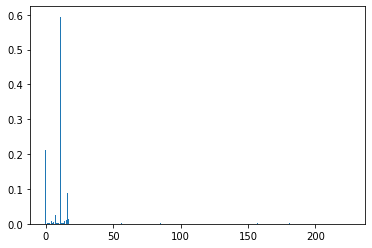

In [ ]:
# get importance
importance = clf1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

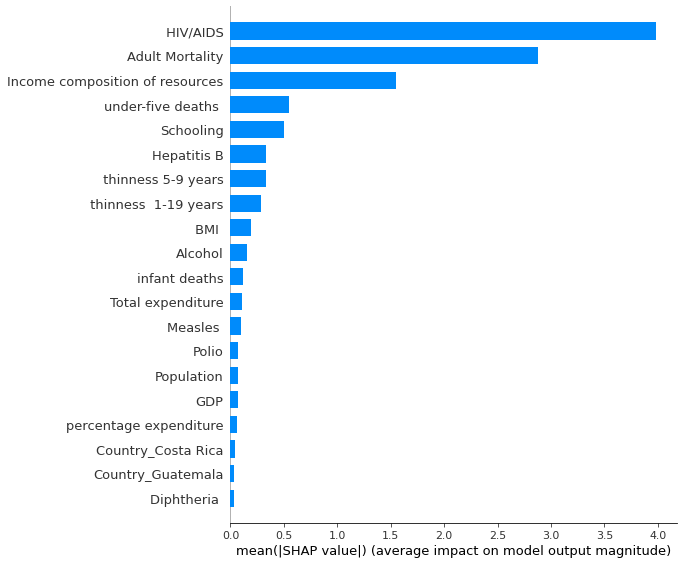

In [ ]:
#SHAP value - Variable Importance
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.summary_plot(shap_values, X_trainr, plot_type="bar")

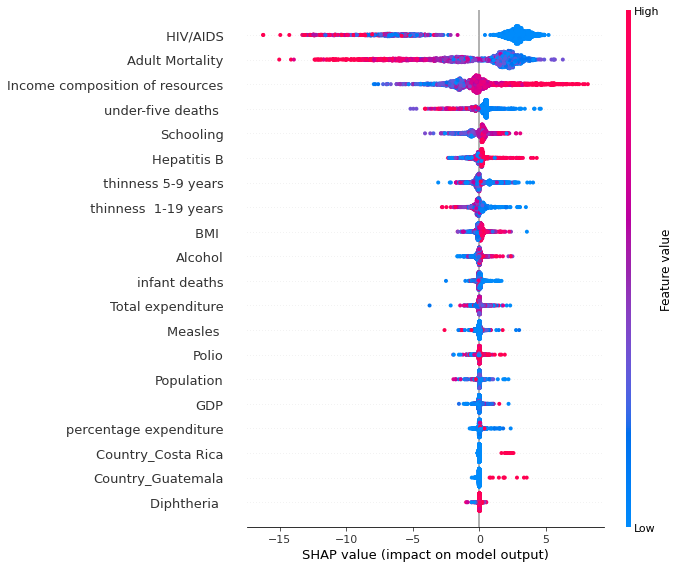

In [ ]:
f = plt.figure()
shap.summary_plot(shap_values, X_trainr)
f.savefig("SHAP_plot_train.png", bbox_inches='tight', dpi=600)

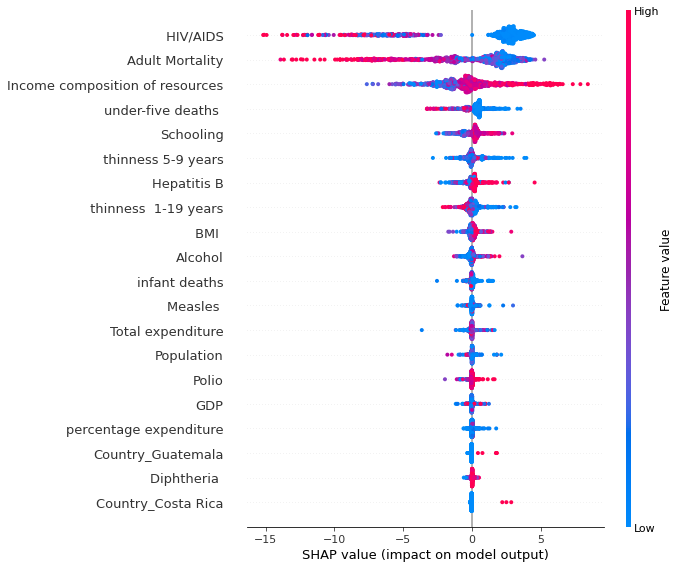

In [ ]:
f = plt.figure()
shap_values = shap.TreeExplainer(clf1).shap_values(X_testr)
shap.summary_plot(shap_values, X_testr)
f.savefig("SHAP_plot_test.png", bbox_inches='tight', dpi=600)

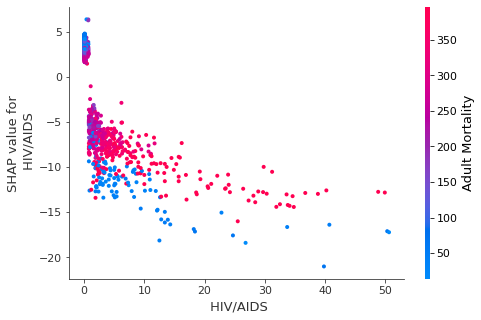

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot(' HIV/AIDS', shap_values, X_trainr)

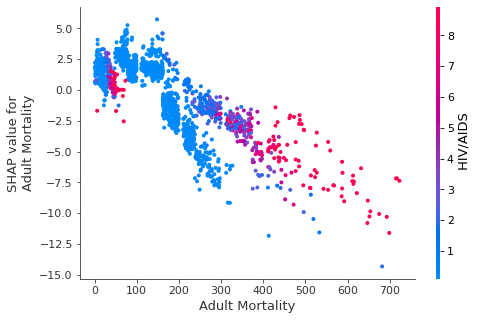

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Adult Mortality', shap_values, X_trainr)

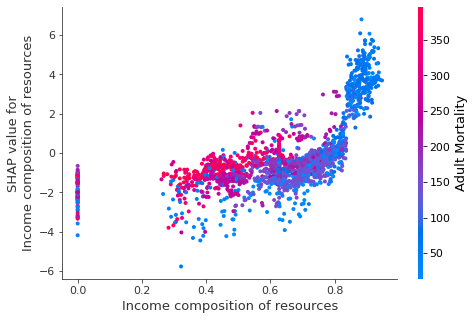

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Income composition of resources', shap_values, X_trainr)

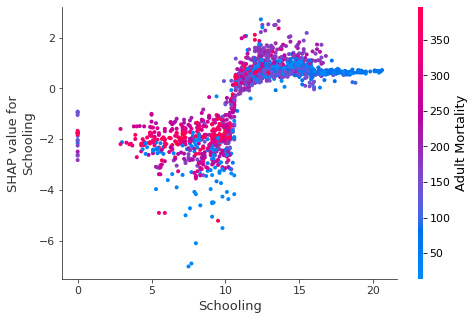

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Schooling', shap_values, X_trainr)

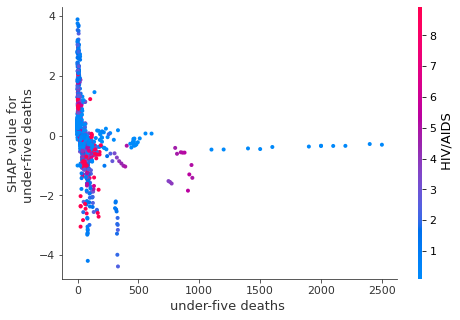

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('under-five deaths ', shap_values, X_trainr)

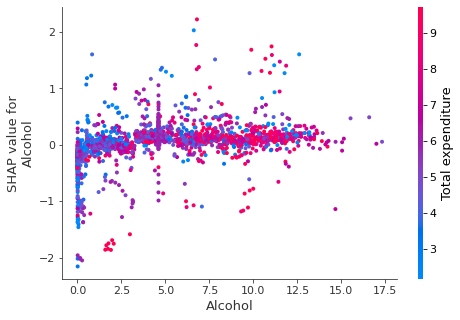

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Alcohol', shap_values, X_trainr)

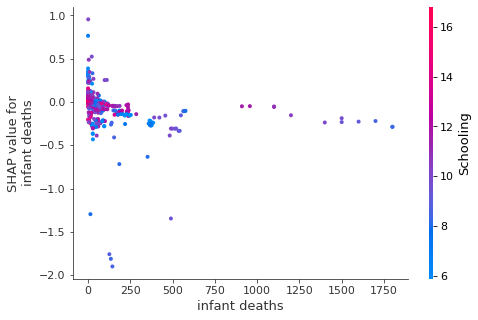

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('infant deaths', shap_values, X_trainr)

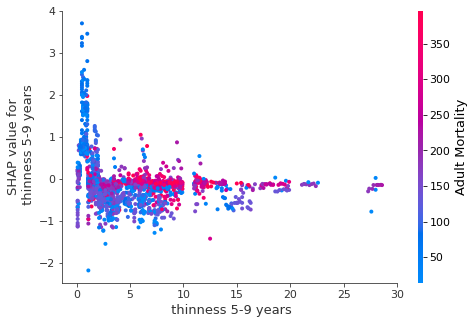

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot(' thinness 5-9 years', shap_values, X_trainr)

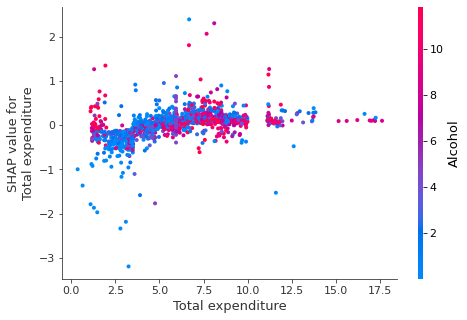

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Total expenditure', shap_values, X_trainr)

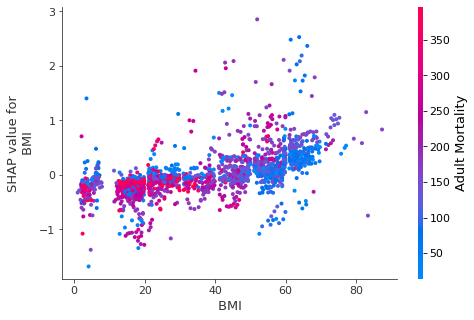

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot(' BMI ', shap_values, X_trainr)

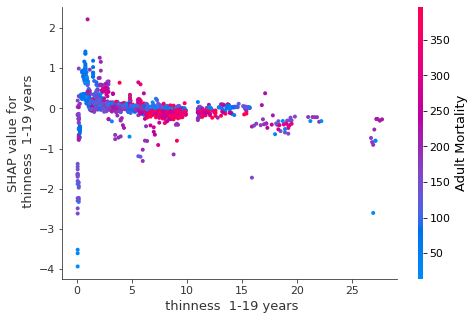

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot(' thinness  1-19 years', shap_values, X_trainr)

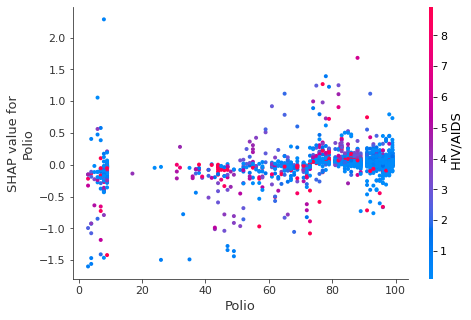

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Polio', shap_values, X_trainr)

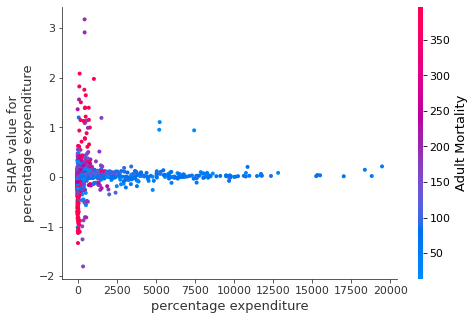

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('percentage expenditure', shap_values, X_trainr)

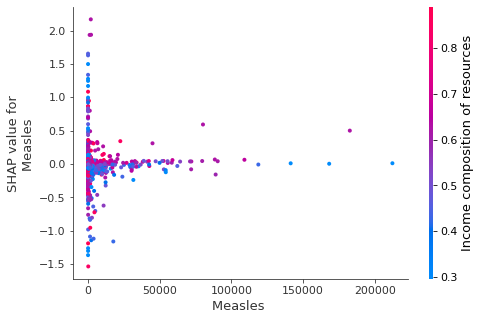

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Measles ', shap_values, X_trainr)

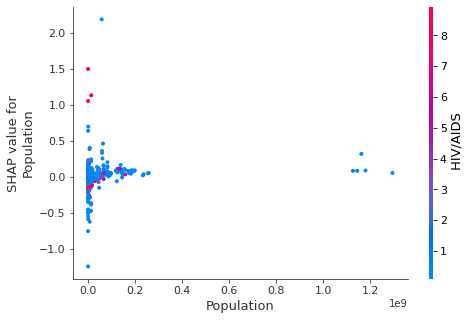

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Population', shap_values, X_trainr)

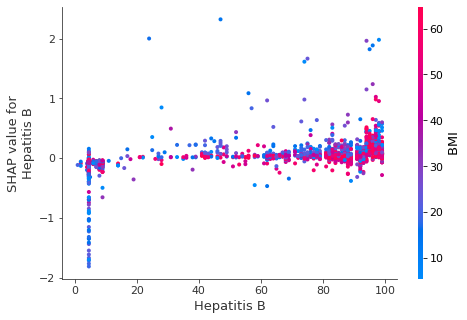

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Hepatitis B', shap_values, X_trainr)

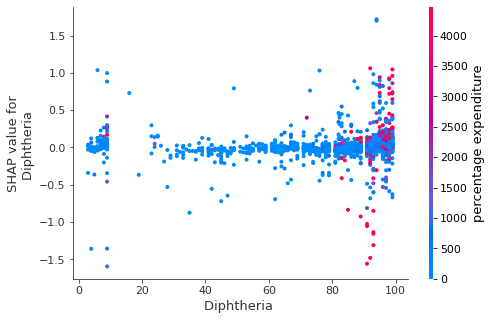

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Diphtheria ', shap_values, X_trainr)

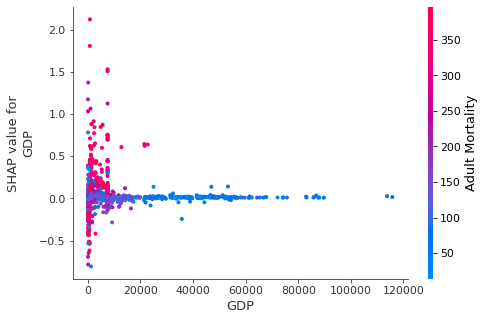

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('GDP', shap_values, X_trainr)

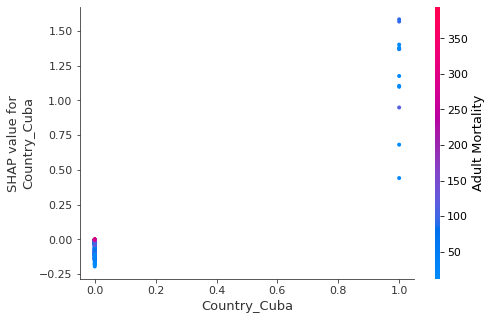

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Country_Cuba', shap_values, X_trainr)

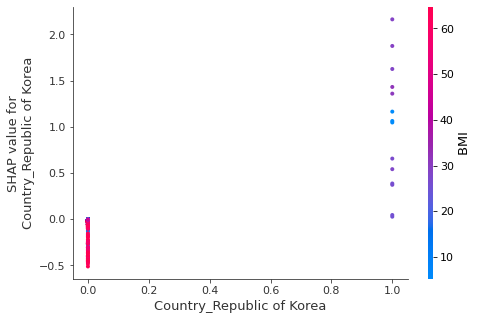

In [ ]:
#SHAP Value - Dependence Plot
shap_values = shap.TreeExplainer(clf1).shap_values(X_trainr)
shap.dependence_plot('Country_Republic of Korea', shap_values, X_trainr)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
np.random.seed(123)

In [ ]:
rf2=RandomForestRegressor(max_features=226//3)
rf2.fit(X_trainr,Y_trainr)

RandomForestRegressor(max_features=75)

In [ ]:
Y_pred=rf2.predict(X_testr)
print("MSE:",mean_squared_error(Y_testr,Y_pred))
print("MAE:",mean_absolute_error(Y_testr,Y_pred))

MSE: 3.324115299811418
MAE: 1.1727304506957605


In [ ]:
params={'n_estimators':(100, 200, 400),'max_features':('auto',226//3)}
rf2a=RandomForestRegressor()
gs=GridSearchCV(rf2a,params)
gs.fit(X_trainr,Y_trainr)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ('auto', 75),
                         'n_estimators': (100, 200, 400)})

In [ ]:
gs.cv_results_

{'mean_fit_time': array([2.51535711, 5.00882802, 9.95130768, 1.10763702, 2.17925735,
        4.36163363]),
 'mean_score_time': array([0.02490258, 0.04224138, 0.08365231, 0.02631526, 0.04259048,
        0.08229856]),
 'mean_test_score': array([0.9578869 , 0.95841328, 0.95876159, 0.9593398 , 0.95962739,
        0.96024704]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 75, 75, 75],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 400, 100, 200, 400],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 100},
  {'max_features': 'auto', 'n_estimators': 200},
  {'max_features': 'auto', 'n_estimators': 400},
  {'max_features': 75, 'n_estimators': 100},
  {'max_features': 75, 'n_estimators': 200},
  {'max_features': 75, 'n_estimators': 400}],


In [ ]:
gs.best_estimator_

RandomForestRegressor(max_features=75, n_estimators=400)

In [ ]:
rf2b=RandomForestRegressor(max_features=75, n_estimators=400)
rf2b.fit(X_trainr,Y_trainr)

RandomForestRegressor(max_features=75, n_estimators=400)

In [ ]:
Y_pred=rf2b.predict(X_testr)
print("MSE:",mean_squared_error(Y_testr,Y_pred))
print("MAE:",mean_absolute_error(Y_testr,Y_pred))

MSE: 3.7127836859723122
MAE: 1.2114488196690296
